PS-05- Neha Palsokar

1 Active data exploration

In [1]:
#Import:

import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#1.1 Load the data:
from sklearn.datasets import load_boston
bdata = load_boston()


In [3]:
#Basic information about dataset:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)

print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [4]:
bx=bdata.data
by=bdata.target

In [5]:
c=pd.DataFrame(bdata.data, columns=bdata.feature_names)
c['target'] = pd.Series(bdata.target)
b=pd.DataFrame(bdata.data, columns=bdata.feature_names)
b['target'] = pd.Series(bdata.target)

In [6]:
#1.2 Add engineered features:
b['x1']=(b.AGE)*(b.NOX)
b['x2']=(b.RAD)*(b.INDUS)
b['x3']=np.sqrt(b.CRIM)
b['x4']=np.sqrt(b.B)
b['x5']=(b.CRIM)*(b.DIS)*(b.RAD)
b['x6']=(b.INDUS)*3
b['x7']=(b.TAX)/5
b['x8']=np.square(b.DIS)
b['x9']=b.DIS*5
b['x10']=(b.RM)*np.sqrt(b.CRIM)


In [7]:
b.head()
#b.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,35.0776,2.31,0.079498,19.922349,0.025849,6.93,59.2,16.728100,20.4500,0.522702
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,37.0041,14.14,0.165257,19.922349,0.271303,21.21,48.4,24.672082,24.8355,1.061118
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,28.6559,14.14,0.165197,19.819939,0.271104,21.21,48.4,24.672082,24.8355,1.186939
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,20.9764,6.54,0.179917,19.865296,0.588700,6.54,44.4,36.750269,30.3110,1.259057
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,24.8236,6.54,0.262774,19.922349,1.255785,6.54,44.4,36.750269,30.3110,1.878043


In [8]:
#1.3-10 Bogus features::

b['b1']=np.random.randn(506)
b['b2']=np.random.randn(506)*2
b['b3']=np.random.randn(506)**2
b['b4']=np.random.randn(506)*4
b['b5']=np.sqrt(np.abs(np.random.randn(506)))
b['b6']=np.square(np.random.randn(506))
b['b7']=np.random.randn(506)/10
b['b8']=np.random.randn(506)/5
b['b9']=np.random.randn(506)**3
b['b10']=np.random.randn(506)+np.random.randn(506)

In [9]:
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,-0.725617,1.166358,0.472386,2.419466,1.033249,0.009667,0.058470,-0.067392,-1.196473,-0.938975
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.075093,-3.478167,0.597288,-3.670610,0.332525,0.737991,0.018568,-0.025723,-6.471998,-0.158452
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,-0.666159,3.562449,0.524845,-4.717419,0.180653,2.548531,0.038916,-0.184646,0.001941,-1.421316
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,-0.781655,0.770905,0.172176,0.017606,1.008977,0.274335,-0.244422,0.436496,-0.015041,-0.704730
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.666784,4.050194,1.372537,-6.023781,0.217327,0.920297,-0.152419,-0.015220,-0.310209,-1.364675


In [10]:
#1.4 dropping target
features=b.drop('target',axis=1)
#b.head()


mean=b.describe().transpose()
mean['Corr']=b.corr().transpose().target
mean['Null count']=b.isnull().sum()

In [11]:
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,-0.725617,1.166358,0.472386,2.419466,1.033249,0.009667,0.058470,-0.067392,-1.196473,-0.938975
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.075093,-3.478167,0.597288,-3.670610,0.332525,0.737991,0.018568,-0.025723,-6.471998,-0.158452
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,-0.666159,3.562449,0.524845,-4.717419,0.180653,2.548531,0.038916,-0.184646,0.001941,-1.421316
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,-0.781655,0.770905,0.172176,0.017606,1.008977,0.274335,-0.244422,0.436496,-0.015041,-0.704730
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.666784,4.050194,1.372537,-6.023781,0.217327,0.920297,-0.152419,-0.015220,-0.310209,-1.364675


In [12]:
mean

,count,mean,std,min,25%,50%,75%,max,Corr,Null count
CRIM,506.0,3.593761,8.596783,0.006320,0.082045,0.256510,3.647423,88.976200,-0.385832,0
ZN,506.0,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000,0.360445,0
INDUS,506.0,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000,-0.483725,0
CHAS,506.0,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000,0.175260,0
NOX,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000,-0.427321,0
RM,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000,0.695360,0
AGE,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000,-0.376955,0
DIS,506.0,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500,0.249929,0
RAD,506.0,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000,-0.381626,0
TAX,506.0,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000,-0.468536,0


Feature number: 0


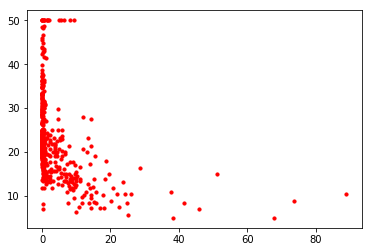

Feature number: 1


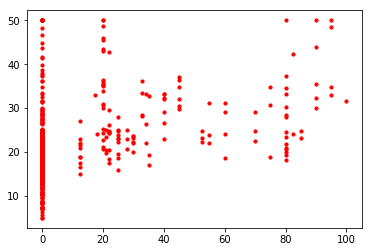

Feature number: 2


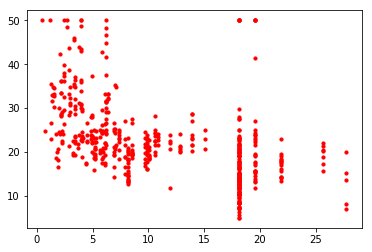

Feature number: 3


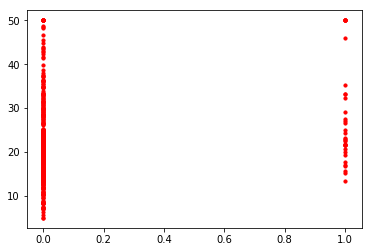

Feature number: 4


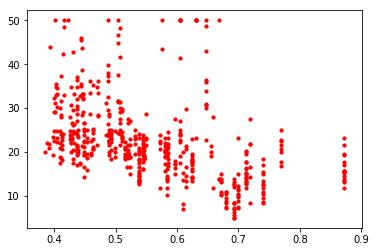

Feature number: 5


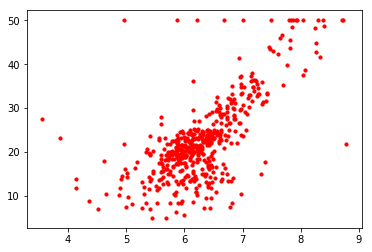

Feature number: 6


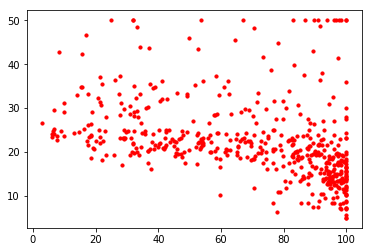

Feature number: 7


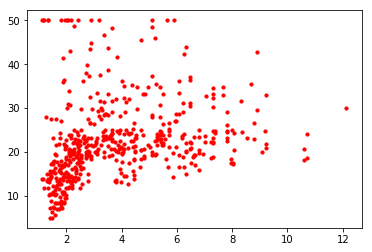

Feature number: 8


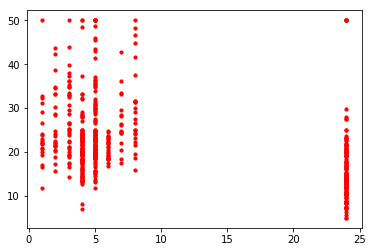

Feature number: 9


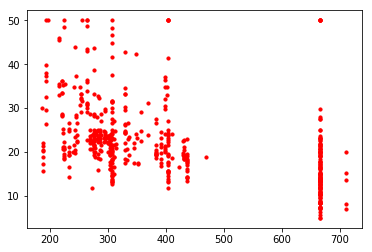

Feature number: 10


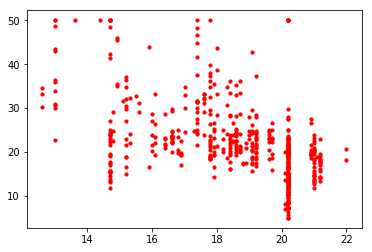

Feature number: 11


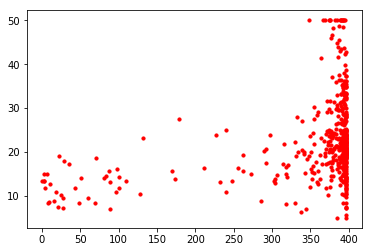

Feature number: 12


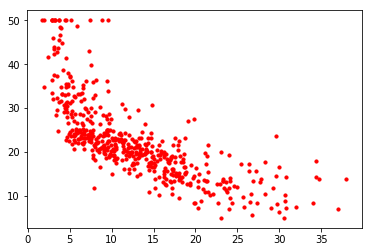

In [13]:
#1.5 Graphical exploration:

for i in range(0,13):
    plt.scatter(b.iloc[:,i],b.target,s=10,color='red')
    print('Feature number:',i )
    plt.show()


In [14]:
#pair wise scatter plot:
#plt.scatter(b['MEDV'], b['LSTAT'])

Feature number: 18


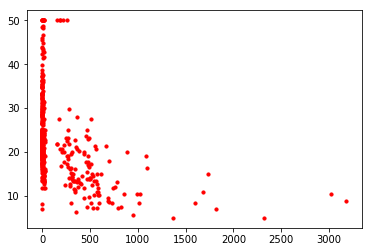

Feature number: 19


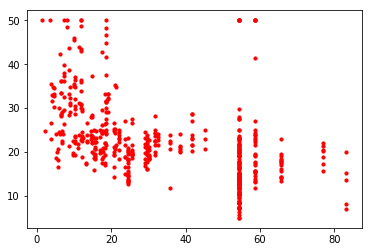

Feature number: 20


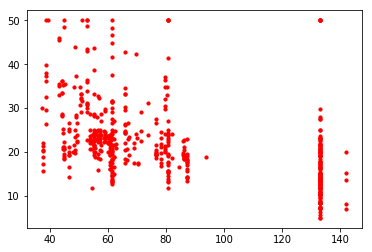

Feature number: 21


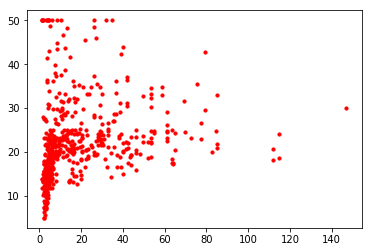

Feature number: 22


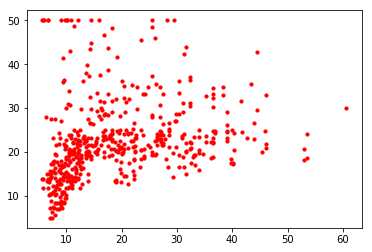

Feature number: 23


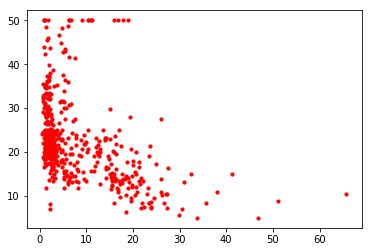

Feature number: 24


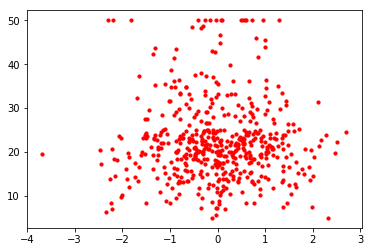

Feature number: 25


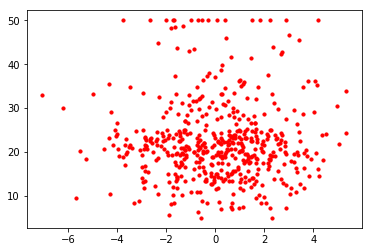

Feature number: 26


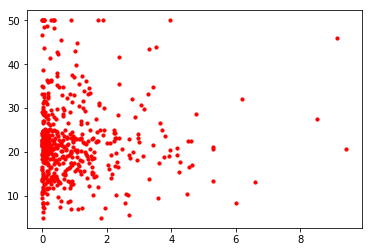

Feature number: 27


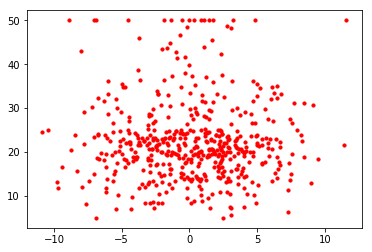

Feature number: 28


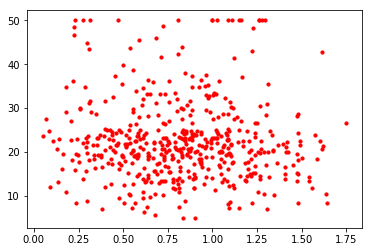

Feature number: 29


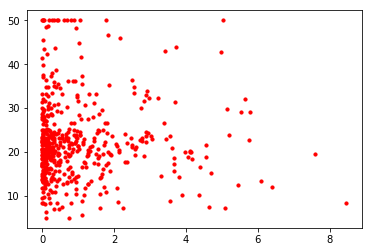

Feature number: 30


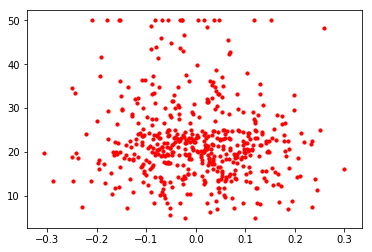

Feature number: 31


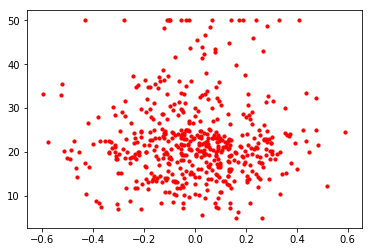

Feature number: 32


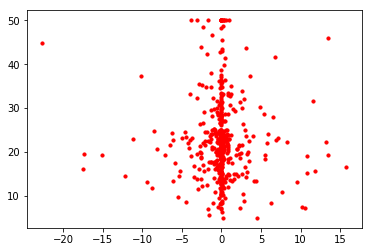

In [15]:
for i in range(18,33):
    plt.scatter(b.iloc[:,i],b.target,s=10,color='red')
    print('Feature number:',i )
    plt.show()

2 Warm-up: a few simple models

In [16]:
lin_reg=LinearRegression()

In [17]:
#using cross validation function:
cross_val_score(lin_reg,features,b.target,cv=100,scoring='neg_mean_squared_error').mean()

-23.27289877149573

In [18]:
#2.1 Loss function
def loss(y,x):
    lin_reg.fit(x,y)
    return(np.square(y - lin_reg.predict(x)).mean())

In [19]:
loss(b.target,features)

17.33115653410058

In [20]:
#MSE
metrics.mean_squared_error(b.target,lin_reg.predict(features))

17.33115653410059

In [21]:
#Calculating for all features:
for i in range(0,34):
    print('Loss function for feature number: ', i, ':: ')
    loss(b.target,b.iloc[:,i].reshape(-1,1))  

Loss function for feature number:  0 :: 


C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


71.85234666526343

Loss function for feature number:  1 :: 


73.4516960947557

Loss function for feature number:  2 :: 


64.66622164107531

Loss function for feature number:  3 :: 


81.82651411931553

Loss function for feature number:  4 :: 


69.00428835540674

Loss function for feature number:  5 :: 


43.60055177116958

Loss function for feature number:  6 :: 


72.42398092899347

Loss function for feature number:  7 :: 


79.14634158607113

Loss function for feature number:  8 :: 


72.12481188075273

Loss function for feature number:  9 :: 


65.88727533683914

Loss function for feature number:  10 :: 


62.65220001376927

Loss function for feature number:  11 :: 


75.03242920751906

Loss function for feature number:  12 :: 


38.48296722989416

Loss function for feature number:  13 :: 


0.0

Loss function for feature number:  14 :: 


68.9144880714567

Loss function for feature number:  15 :: 


69.07491551353158

Loss function for feature number:  16 :: 


66.53132819746094

Loss function for feature number:  17 :: 


75.65161064631135

Loss function for feature number:  18 :: 


70.5853851927165

Loss function for feature number:  19 :: 


64.6662216410753

Loss function for feature number:  20 :: 


65.88727533683914

Loss function for feature number:  21 :: 


81.18083038442688

Loss function for feature number:  22 :: 


79.14634158607113

Loss function for feature number:  23 :: 


69.2328690626011

Loss function for feature number:  24 :: 


84.4117392480689

Loss function for feature number:  25 :: 


84.41669890024708

Loss function for feature number:  26 :: 


84.41683642047145

Loss function for feature number:  27 :: 


84.41606193643014

Loss function for feature number:  28 :: 


84.23755772032871

Loss function for feature number:  29 :: 


84.4100149602184

Loss function for feature number:  30 :: 


83.68977131195223

Loss function for feature number:  31 :: 


84.39221319469233

Loss function for feature number:  32 :: 


84.2934291735002

Loss function for feature number:  33 :: 


84.22460442937547

In [22]:
#2.2 A few simple regressions


#1
#Model- variables RM(average number of rooms per dwelling)
modelRM=smf.ols('b.target~b.RM',data=b).fit()
print (modelRM.rsquared**.5)

0.6953599470715395


In [31]:
#2

#K-Fold cross validation
scores=[]
for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(b.RM,b.target,test_size=0.3,random_state=i)
    scores.append(loss(y_train,x_train.reshape(-1,1)))
scores
print('After CV, RMSE is: ', np.mean(scores))

C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


[46.938573719831275,
 46.1074190249355,
 46.39252838390491,
 40.22019702170216,
 42.339206232020125,
 41.519702497456045,
 38.698920889884135,
 45.75024369854484,
 42.728248947660084]

After CV, RMSE is:  43.41056004621545


In [32]:
#Alternate method:
def cal_rmse(X_train,y_train,model):
    predict=lin_reg.predict(X_train.reshape(-1,1))
    mse=metrics.mean_squared_error(y_train,predict)
    rmse=np.sqrt(mse)
    return rmse
cal_rmse(x_train,y_train,modelRM)

C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


6.536684859136171

In [33]:
#3
#10 features
model=smf.ols('b.target~b.iloc[:,18:28]',data=b).fit()
m1=(model.rsquared**.5)
m1

0.5625210834675274

In [34]:
scores2=[]
for i in range(1,10):
    x_train2,x_test2,y_train2,y_test2=train_test_split(b.iloc[:,18:28],b.target,test_size=0.3,random_state=i)
    scores2.append(loss(y_train2,x_train2))
scores2
print('After CV, RMSE for features 18 to 28 : ', np.mean(scores2))

[57.32629331425339,
 58.235811358379216,
 59.360481044598686,
 48.574557111274295,
 51.3644308899748,
 51.633325522157186,
 59.27053566342918,
 58.26365301074721,
 56.861939703666216]

After CV, RMSE for features 18 to 28 :  55.65455862427558


In [27]:
#Features 28 to 33
model=smf.ols('b.target~b.iloc[:,28:33]',data=b).fit()
m1=(model.rsquared**.5)
m1

0.11389442306870406

In [35]:
scores3=[]
for i in range(1,10):
    x_train3,x_test3,y_train3,y_test3=train_test_split(b.iloc[:,28:33],b.target,test_size=0.3,random_state=i)
    scores3.append(loss(y_train3,x_train3))
scores3
print('After CV,RMSE for features 28 to 33:', np.mean(scores3))

[80.09737943551718,
 83.30228125620637,
 85.56405722689392,
 74.5388344604437,
 78.32411199485263,
 79.5654384276262,
 87.3419204706605,
 83.36107914889926,
 81.0879033314089]

After CV,RMSE for features 28 to 33: 81.46477841694542


In [29]:
#4
#Apply for all features:
model_all=smf.ols('b.target~features',data=b).fit()
m2=(model_all.rsquared**.5)
print(m2)

0.8914606623963109


In [36]:
scores4=[]
for i in range(1,10):
    x_train4,x_test4,y_train4,y_test4=train_test_split(features,b.target,test_size=0.3,random_state=i)
    scores4.append(loss(y_train4,x_train4))
scores4
print('After CV,RMSE for all features is:', np.mean(scores4))

[18.05626189828954,
 16.546949563567075,
 17.53511546484468,
 14.507345996356769,
 15.328928841124702,
 14.962434437304003,
 15.93066161974221,
 17.545744320992675,
 18.442473991656673]

After CV,RMSE for all features is: 16.539546237097593


#5
After calculating RMSE for different features we can see the least RMSE is for all featues. Therefore we can say it is the best model.
values:
RMSE- 16.539546237097593
correlation- 0.8914606623963109

3 Find the best model

In [37]:
#1

#Different linear regression models that can be built:
#No of features-33

no_of_models=(2**33)-1
print(no_of_models)

8589934591


In [38]:
#2
def test_model(x,y):
    scores5=[]
    for i in range(1,10):
        x_train5,x_test5,y_train5,y_test5=train_test_split(features.iloc[:,x:y],b.target,test_size=0.3,random_state=i)
        scores5.append(loss(y_train5,x_train5))
    print('After CV,Avg RMSE: ', np.mean(scores5))

In [39]:
start_time=time.time()
count=0
for var1 in range(0,15):
    for var2 in range(15,34):
        count+=1
        test_model(var1,var2)
end_time=time.time()
print("Total time taken : ", end_time-start_time)
print("Total models : ", count)

After CV,Avg RMSE:  21.234105655258627
After CV,Avg RMSE:  21.09589534543251
After CV,Avg RMSE:  21.01157606916679
After CV,Avg RMSE:  20.409529084931027
After CV,Avg RMSE:  20.409529084931037
After CV,Avg RMSE:  20.409529084931034
After CV,Avg RMSE:  19.709224749146276
After CV,Avg RMSE:  19.709224749146276
After CV,Avg RMSE:  16.959797548162367
After CV,Avg RMSE:  16.917996853454454
After CV,Avg RMSE:  16.896485569244508
After CV,Avg RMSE:  16.860103816792243
After CV,Avg RMSE:  16.81619870255343
After CV,Avg RMSE:  16.80199817591044
After CV,Avg RMSE:  16.65363165942422
After CV,Avg RMSE:  16.621320256619946
After CV,Avg RMSE:  16.576281536651074
After CV,Avg RMSE:  16.56874585225769
After CV,Avg RMSE:  16.539546237097593
After CV,Avg RMSE:  21.750435366075145
After CV,Avg RMSE:  21.436715206322496
After CV,Avg RMSE:  21.298731976819006
After CV,Avg RMSE:  20.53552540550966
After CV,Avg RMSE:  20.53552540550966
After CV,Avg RMSE:  20.535525405509663
After CV,Avg RMSE:  19.7551067108

After CV,Avg RMSE:  34.359725871131495
After CV,Avg RMSE:  33.53292419309678
After CV,Avg RMSE:  32.538683656203915
After CV,Avg RMSE:  30.850728285491844
After CV,Avg RMSE:  30.78259872851782
After CV,Avg RMSE:  30.753660611982266
After CV,Avg RMSE:  30.708369919032286
After CV,Avg RMSE:  30.63162525215209
After CV,Avg RMSE:  30.621089948155184
After CV,Avg RMSE:  30.605388759570783
After CV,Avg RMSE:  30.538532446782376
After CV,Avg RMSE:  30.409399425841602
After CV,Avg RMSE:  30.304991538019678
After CV,Avg RMSE:  30.241188285566256
After CV,Avg RMSE:  30.205580490988098
After CV,Avg RMSE:  36.56868509168862
After CV,Avg RMSE:  36.533506809808436
After CV,Avg RMSE:  36.2033566660902
After CV,Avg RMSE:  35.02931746104119
After CV,Avg RMSE:  34.369552922319315
After CV,Avg RMSE:  33.54356401290852
After CV,Avg RMSE:  32.556013390800864
After CV,Avg RMSE:  30.869985680500545
After CV,Avg RMSE:  30.802007653382613
After CV,Avg RMSE:  30.77336999098266
After CV,Avg RMSE:  30.72810533691

Total time taken :  7.66858983039856
Total models :  285

In [40]:
#Total time to evaluate all the possible models:
(7.668/285)*(no_of_models)

231114450.6799579

The amount of time taken to evaluate all possible models is enormous hence it will not be possible to store it in the computers memory

3.2 Forward selection

In [41]:

scores6=[]
for i in range(0,33):
    x_train6,x_test6,y_train6,y_test6=train_test_split(features.iloc[:,i].reshape(-1,1),b.target,test_size=0.3,random_state=10)
    scores6.append(loss(y_train6,x_train6))

print(scores6)
print(scores6.index(np.min(scores6)))


[66.75262452940224, 63.82174566205943, 57.61861392669907, 76.24109712777835, 61.72205937344344, 43.154591710739496, 64.05141039083298, 71.17695949512247, 66.29081540058881, 59.87639244884547, 57.983954959899336, 68.82351995683257, 34.74064706687557, 60.98750280627288, 63.41401114665584, 60.672918563044114, 69.4473141516226, 65.14686924544085, 57.61861392669907, 59.87639244884546, 73.63808482676323, 71.17695949512249, 62.93495580385277, 77.66493072613417, 77.69237641802512, 77.65683841741705, 77.6144974653618, 76.94775557378038, 77.47518446235857, 76.9860145460069, 77.68510935969141, 77.52421534418768, 77.26493098966137]
12


C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [42]:
#Feature number 12 (% lower status of the population)has lowest MSE

In [43]:
#1-feature model

smf.ols('b.target~b.LSTAT',data=b).fit().rsquared

0.5441462975864797

In [44]:
#Adding features

smf.ols('b.target~b.LSTAT*b.RM',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX',data=b).fit().rsquared
smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX*b.PTRATIO',data=b).fit().rsquared

0.7402460563066404

0.7696350288844247

0.7969725012131853

0.816293755615119

0.8404455050934612

0.8831812146719424

0.9319077898409808

0.9692331686476566

0.9876859658496437

0.9934346888590082

In [45]:
#FORWARD SELECTION MODEL
#Best model with R-squared value of 0.993

bestmodel=smf.ols('b.target~b.LSTAT*b.RM*b.AGE*b.INDUS*b.x5*b.x6*b.CRIM*b.x1*b.x3*b.NOX*b.PTRATIO',data=b).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               b.target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     91.27
Date:                Thu, 24 May 2018   Prob (F-statistic):          2.09e-137
Time:                        00:05:48   Log-Likelihood:                -568.67
No. Observations:                 506   AIC:                             1769.
Df Residuals:                     190   BIC:                             3105.
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 0.0002   1.63e-05     13.109      0.000       0.000       0.000
b.LSTAT                                                                   0.0002   6.04e-05      3.199      0.002    7.41e-05       0.000
b.RM                                                                      0.0020      0.000     14.283      0.000       0.002       0.002
b.LSTAT:b.RM                                                              0.0030      0.000      7.023      0.000       0.002       0.004
b.AGE                                                                     0.0010      0.000      5.604      0.000       0.001       0.001
b.LSTAT:b.AGE                                                             0.0009      0.001      1.565      0.119      -0.000       0.002
b.RM:b.AGE                                                                0.0145      0.001     10.486      0.000       0.012       0.017
b.LSTAT:b.RM:b.AGE                                                        0.0158      0.003      5.011      0.000       0.010       0.022
b.INDUS                                                                   0.0001   3.39e-05      3.266      0.001    4.38e-05       0.000
b.LSTAT:b.INDUS                                                          -0.0004      0.000     -2.997      0.003      -0.001      -0.000
b.RM:b.INDUS                                                              0.0016      0.000      7.270      0.000       0.001       0.002
b.LSTAT:b.RM:b.INDUS                                                     -0.0001      0.001     -0.187      0.852      -0.002       0.001
b.AGE:b.INDUS                                                             0.0002      0.000      1.077      0.283      -0.000       0.001
b.LSTAT:b.AGE:b.INDUS                                                    -0.0008      0.001     -1.136      0.257      -0.002       0.001
b.RM:b.AGE:b.INDUS                                                        0.0076      0.001      5.200      0.000       0.005       0.010
b.LSTAT:b.RM:b.AGE:b.INDUS                                                0.0003      0.001      0.301      0.764      -0.002       0.002
b.x5                                                                   5.772e-05   2.03e-05      2.843      0.005    1.77e-05    9.78e-05
b.LSTAT:b.x5                                                             -0.0002      0.000     -1.571      0.118      -0.000    4.25e-05
b.RM:b.x5                                                                 0.0007      0.000      4.265      0.000       0.000       0.001
b.LSTAT:b.RM:b.x5                              

4 Principal components

In [46]:
m3 = PCA().fit(features)
print("components:", m3.components_)
print("explained_variance:", m3.explained_variance_)
print("explained_variance_ratio:", m3.explained_variance_ratio_)
print("singular_values:", m3.singular_values_)

components: [[ 2.04482808e-02 -1.63198739e-02  9.91490051e-03 ...  8.72146194e-06
   5.15849211e-04  3.16495789e-04]
 [ 1.71676170e-02  3.32688009e-02 -2.06723571e-02 ... -4.20215830e-05
   4.95155649e-04 -6.83863643e-04]
 [-2.74535125e-03 -5.17694733e-03  9.65917127e-04 ... -1.57308979e-04
   1.04861572e-03 -9.85071616e-04]
 ...
 [-0.00000000e+00 -1.11022302e-16  1.13814437e-01 ...  8.75601674e-16
  -3.66373598e-15 -6.62664368e-16]
 [-0.00000000e+00 -0.00000000e+00  3.73732954e-02 ...  6.20163643e-16
   1.24900090e-16  7.97972799e-17]
 [-0.00000000e+00  4.30211422e-16 -9.41089534e-01 ...  6.34420901e-16
   4.68375339e-17 -3.16587034e-17]]
explained_variance: [1.52349033e+05 2.45149830e+04 6.28937108e+03 1.81963635e+03
 1.31993857e+03 3.24423692e+02 1.60347785e+02 1.41434590e+02
 2.57212475e+01 2.39214746e+01 1.57805541e+01 1.02771649e+01
 5.00046230e+00 4.32649112e+00 2.82624778e+00 2.22050976e+00
 1.77361431e+00 1.74420048e+00 1.64932237e+00 1.41105889e+00
 9.30708579e-01 8.94021228e

[[-4.47151480e+01 -6.48565289e+01 -1.51336041e+01  1.77844477e+00
   3.27096581e+00  1.34103570e+01 -1.24215435e+02 -5.53871297e+00
  -2.81969031e+01 -9.55730575e+00 -3.04735337e+01 -3.48208447e-01
  -1.25188627e+02  2.40029646e+02 -1.34676632e+01  3.80880625e+00
   1.92711590e-01  1.05101388e+01 -4.81717235e+01 -7.82220611e-01
   9.29073418e+01 -2.47919092e+01  7.13347303e+01 -3.85087580e+00
  -4.08802593e+01 -9.45267333e+00 -6.24311238e-01  2.25968949e+00
  -3.09226439e+00  3.95553209e-01  5.24646241e+00 -3.73767560e+02
   1.63699024e+01]
 [-4.17498070e+01 -6.87918827e+01 -1.54347477e+01  4.73093769e-01
   2.71936970e+00  1.09964365e+01 -9.79480036e+01 -7.35146573e+00
  -3.66262573e+01  1.25243698e-01 -1.37460046e+01 -6.87132651e+00
  -9.96820759e+01  2.03804418e+02 -2.68301641e+00  3.46461095e+00
  -1.75629749e+00  7.22155134e-01 -4.59852763e+01  5.42590569e+00
   9.60772390e+01 -1.77776100e+01  5.51929749e+01 -7.72769935e+00
  -4.43454014e+01  4.66459478e+00  1.50978983e+00 -3.0408

variance by variable:
 0        237.482175
1        599.537709
2         68.462111
3         19.369317
4          4.908447
5        109.439579
6       5442.293477
7        678.852968
8        704.691206
9        213.349880
10      7436.319824
11        64.381431
12      5097.110717
13     15368.427664
14       157.333658
15         2.491782
16       328.999683
17       174.505620
18       578.957825
19        13.666933
20      5825.043517
21     16949.054972
22       407.738782
23       284.556646
24       916.066767
25      5990.368061
26        44.449912
27        11.646521
28      2422.418019
29         2.888094
30        36.946282
31      8975.955108
32    107481.059999
dtype: float64
mean by variable:
 0     -48.900865
1     -74.304366
2     -20.892009
3       2.890701
4       4.725105
5      17.234785
6    -176.275430
7     -24.829225
8     -22.273818
9      -5.778437
10     40.254360
11     -9.434704
12   -171.530875
13    324.598142
14     -9.911717
15      2.471023
16    -12.1

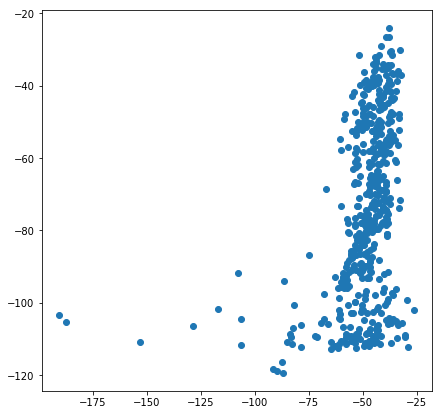

In [47]:
#Rotated data
dR = features @ m3.components_
print(dR[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dR[:,0], dR[:,1])
print("variance by variable:\n", pd.DataFrame(dR).apply(np.var, axis=0))
print("mean by variable:\n", pd.DataFrame(dR).apply(np.mean, axis=0))

[[-2.24671957e+02  7.59530816e+01 -7.53301279e+00  1.46536095e+01
  -9.27358908e+00  3.28722422e+00 -1.68811581e+00 -2.02302452e+01
  -2.15680946e+00  3.20643638e+00  2.34352442e+00  1.33540687e+00
   2.40456698e+00 -1.56933786e+00 -1.15178193e+00  1.01423429e+00
  -1.31763070e+00  6.57355467e-01 -4.51969091e-01 -8.45447558e-01
   1.92546729e+00  2.05587320e+00  1.55957988e-01 -2.90806012e-02
   3.64952250e-01 -1.35420533e-01 -6.62144938e-02  7.00778693e-02
   7.25005743e-02  2.71279243e-02  2.90798941e-13  1.73732957e-13
   2.27477473e-13]
 [-2.38402094e+02  1.01428790e+02 -1.95763534e+00 -3.36794938e+01
  -2.19879645e+01  4.42296551e+00  1.40544918e+01 -1.15757024e+00
  -4.61908192e+00 -3.04616057e+00 -3.34524169e+00  6.33792896e+00
   2.24889048e+00  3.36642133e+00 -1.10341430e+00  3.50044530e-01
  -3.26754619e-01 -1.52444318e-01 -1.74917665e-01 -1.48303930e+00
   1.00605198e+00  1.07439281e+00  3.26962528e-02  1.81893823e-01
  -5.17841016e-01 -7.57185347e-02 -1.04997824e-01  2.3305

Variance by variable:
 [1.52047948e+05 2.44665344e+04 6.27694149e+03 1.81604023e+03
 1.31733000e+03 3.23782539e+02 1.60030892e+02 1.41155075e+02
 2.56704150e+01 2.38741989e+01 1.57493673e+01 1.02568543e+01
 4.99057996e+00 4.31794074e+00 2.82066231e+00 2.21612140e+00
 1.77010914e+00 1.74075344e+00 1.64606284e+00 1.40827024e+00
 9.28869234e-01 8.92254387e-01 2.99815666e-01 1.95389086e-01
 1.09945156e-01 5.79270564e-02 3.79279744e-02 1.82625543e-02
 1.01872245e-02 2.37977390e-04 3.68399225e-28 1.31319358e-27
 1.32618075e-27]
Mean by variable:
 [ 2.87587257e-14  7.18968144e-15  6.42577778e-14  1.03351671e-14
  6.29097126e-15 -6.17863248e-15 -1.09530303e-15 -1.23572650e-15
 -4.15653458e-15 -3.59484072e-15 -1.68508159e-16 -3.15952798e-16
 -1.93082265e-15  6.81053808e-16 -4.07228050e-16  1.27785354e-15
  1.93082265e-16 -1.40423466e-17  1.75529332e-16  1.71316628e-15
  5.26587996e-18 -3.01910451e-16 -2.17305313e-15 -2.13268138e-16
  3.34822201e-16 -4.91482129e-17  9.65411326e-17  4.89288013e-1

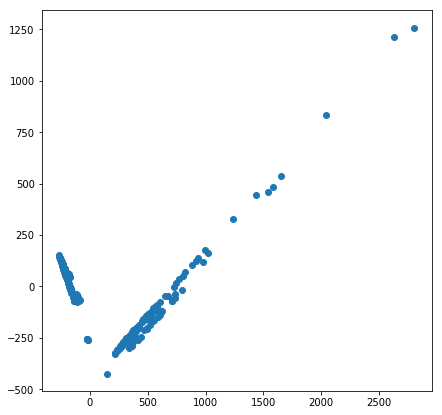

In [48]:
dataRot = PCA().fit_transform(features)
print(dataRot[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dataRot[:,0], dataRot[:,1])
print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))
print("Mean by variable:\n", np.apply_along_axis(np.mean, 0, dataRot))

[68.11404245167219,
 68.55730033044902,
 60.45491557448148,
 47.66068027757382,
 52.04049968486066,
 32.34232853771657,
 30.862054153671043,
 31.673495863616807,
 31.777117590612885,
 28.932915220974827,
 26.448021876074446,
 26.978068895228237,
 21.896317677141745,
 4.267336381531155e-28,
 6.833139902072039e-28,
 4.554824927809581e-28,
 4.52327049160074e-28,
 5.314738648966127e-28,
 1.9736468647732405e-26,
 1.3649967765086964e-28,
 1.8469373075034655e-28,
 9.570197548506242e-28,
 1.0359259011584512e-27,
 5.734907359924945e-28,
 5.631776052880797e-28,
 1.3393186855175618e-27,
 4.383503949297175e-28,
 1.896787077135652e-28,
 1.172251761999696e-27,
 4.438606106368927e-27,
 4.141854015505745e-28,
 4.6156830953846815e-28]

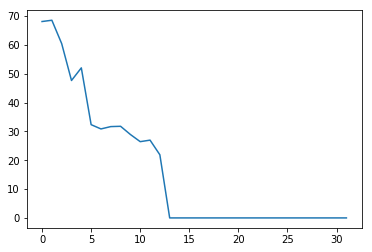

In [49]:
#5 cross-validated MSE depends on number of components-
scores7=[]
score_rmse=[]
for i in range(1,33):
    X=b.iloc[:,0:i]
    x_train7,x_test7,y_train7,y_test7=train_test_split(X,b.target,test_size=0.3,random_state=i)
    
    scores7.append(loss(y_train7,x_train7))
    
scores7

plt.plot(scores7)

In [50]:
# We notice that as we keep adding features at every stage, the RMSE value decreases. So all features give least RMSE

In [51]:
#4.2 PCA on normalized data
scaler = StandardScaler()
new_df=scaler.fit_transform(features)

In [52]:
m4 = PCA().fit(new_df)
print("components:", m4.components_)
print("explained_variance:", m4.explained_variance_)
print("explained_variance_ratio:", m4.explained_variance_ratio_)
print("singular_values:", m4.singular_values_)

components: [[ 1.95762742e-01 -1.62274703e-01  2.38813055e-01 ...  1.60875408e-02
   1.94824012e-02  2.99869964e-02]
 [ 2.77717942e-01  2.84859730e-01 -1.33281643e-01 ... -6.44153585e-02
  -3.88890746e-03  2.95700830e-02]
 [ 3.97178319e-02  6.16206655e-02 -1.09490693e-01 ...  1.09226939e-02
   1.16667635e-01 -1.37039772e-01]
 ...
 [ 0.00000000e+00  8.67361738e-17  5.35570349e-01 ... -3.46944695e-17
   1.87350135e-16 -2.77555756e-17]
 [ 0.00000000e+00  1.73472348e-15 -2.20748644e-01 ... -4.16333634e-17
   4.71844785e-16 -6.66133815e-16]
 [ 0.00000000e+00  1.71303943e-16  4.05505163e-01 ... -1.21430643e-16
   1.11022302e-16 -8.32667268e-17]]
explained_variance: [1.24474067e+01 2.92111680e+00 1.53705698e+00 1.51537144e+00
 1.29882535e+00 1.18324742e+00 1.11463452e+00 1.07108684e+00
 1.03467991e+00 1.02447265e+00 9.68683847e-01 9.33160689e-01
 9.06981141e-01 8.80971020e-01 8.07274070e-01 7.93576227e-01
 6.86567049e-01 5.36734249e-01 4.29920265e-01 3.27960602e-01
 2.44894803e-01 1.85168177e

#4.3

Variance of data points in case of normalized PCA depends on all features equally, however, in case of normal PCA it depends on every individual feature under consideration. Therefore normalized PCA can be considered to be precise. In terms of simplicity and easy interpretation, the the full model and PCA on raw data are winners.